In [1]:
# Importing Dependencies 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
goldData = pd.read_csv('goldData.csv')

In [3]:
# print first 5 rows of the data

goldData.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# printing last 5 rows of the data for knowing the date 

goldData.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number of Rows and Columns of DataSet 

goldData.shape

(2290, 6)

In [6]:
# we don't have any non-null values in our dataset 
goldData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# this function will give us the number of null values in dataset   
goldData.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# Statistics of the dataset
goldData.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
# Correlation 

# 1. Positive Correlation. GLD and SLV prices are positively correlated.
# 2. Negative Correlation

# .corr() calculates the co-relationship between the features

correlation = goldData.corr()


In [14]:
# constructing a heatmap to understand the correlation
# size of the graph you want. 

plt.figure(figsize=(20,20))


<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<AxesSubplot:>

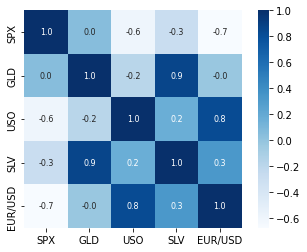

In [15]:
# cbar = True will show the color bar on the right side of the graph
# annot = True will show the correlation value in each cell
# square = True will make the graph look like a square
# fmt = '.2f' will show the correlation value in 2 decimal points
# annot_kws = {'size': 10} will set the font size of the correlation value to 10

sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [16]:
# Correlation values of GLD 

print(correlation['GLD'].sort_values(ascending=False),'\n')

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64 



y:\python\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='GLD', ylabel='Density'>

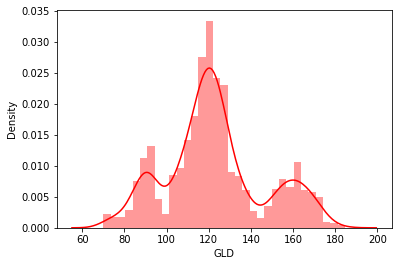

In [18]:
# Checking the Distribution of the GLD price 

sns.distplot(goldData['GLD'], color='red')
# majority of values is at 120

In [19]:
# Removing Date and GLD columns from the dataset
# Spliting the dataset into independent and dependent variables
# axis = 1 means Column 

Y = goldData['GLD']
X = goldData.drop(['Date','GLD'], axis=1)


In [20]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [21]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [22]:
# Splitting the dataset into training and testing set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [25]:
# Model Training 

# Using Random Forest Regressor ( ensemble model means it uses multiple models (decision trees) to make predictions )

regressor = RandomForestRegressor(n_estimators=100)

In [26]:
# Training the Model 

regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [27]:
# Model Evaluation 

# Prediction on training data

testDataPrediction = regressor.predict(X_test)

In [28]:
print(testDataPrediction)

[168.74039962  82.16409988 116.14420004 127.74710048 120.77220159
 154.69559766 150.36989833 126.13520042 117.45639905 125.95870096
 116.75140093 171.74480105 141.57629811 167.9065982  115.02209988
 117.80320045 139.7525029  170.3044013  159.05320307 159.65619956
 154.93700019 125.37579995 174.86389997 157.06170319 125.15920007
  93.74289978  77.42390021 120.68049979 119.09059918 167.40149994
  88.16820075 125.10670011  91.17860102 117.85280031 121.09919845
 136.2560012  115.60850113 115.28070096 148.31450023 107.34610125
 104.86150259  87.17909785 126.53890044 118.13330009 153.81879901
 119.67169999 108.23200048 107.84639852  93.15780014 127.09849792
  74.75720073 113.65139975 121.5086     111.30679896 118.85959892
 120.4854996  159.3365002  168.51230148 147.09869705  86.05589898
  94.25160043  86.77579924  90.67150038 118.90720102 126.53530071
 127.72500033 170.62319994 122.33269949 117.42439882  98.30350013
 168.05650088 143.00869806 132.19420236 121.08910234 120.71879954
 119.87240

In [29]:
# R Squared Error 
# R squared error tells how good your model is. It is always between 0 to 1. 1 means perfect predictions
# real value and predicted values in r2_score
errorScore = metrics.r2_score(Y_test, testDataPrediction)

In [30]:
print("R Squared Error: ", errorScore*100,"%")

R Squared Error:  98.89873812383269 %


In [31]:
# Compare the Actual Values and Predicted Values 

yTest = list(Y_test)

